## Tutors - expected math exam results

**Задача**

Предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

**Наименование файлов с данными**

train.csv - обучающий датасет<br>
test.csv - тестовый датасет

**Целевая переменная**

mean_exam_points - средний балл на экзамене по математике

#### Загрузка модулей и исходных данных

In [1]:
import random
import numpy as np 
import pandas as pd
from tqdm import tqdm_notebook
import itertools
from itertools import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
sns.set()
sns.set_palette('husl')

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

In [2]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'family': 'Calibri'}
label_dict = {'fontsize': '14', 'family': 'Calibri'}

In [3]:
# Загрузка тренировочных и тестовых данных
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
# Целевая переменная
TARGET_NAME = 'mean_exam_points'

### Обзор обучающего и тренировочного датасетов

In [4]:
data_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


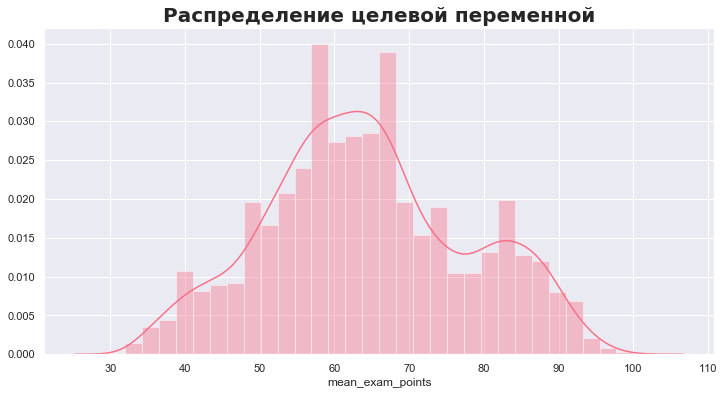

In [6]:
plt.figure(figsize=(12, 6))
sns.distplot(data_train[TARGET_NAME], bins=30)
plt.title('Распределение целевой переменной', fontdict=title_dict);

In [7]:
FEATURES = data_train.columns.drop(TARGET_NAME).drop('Id')

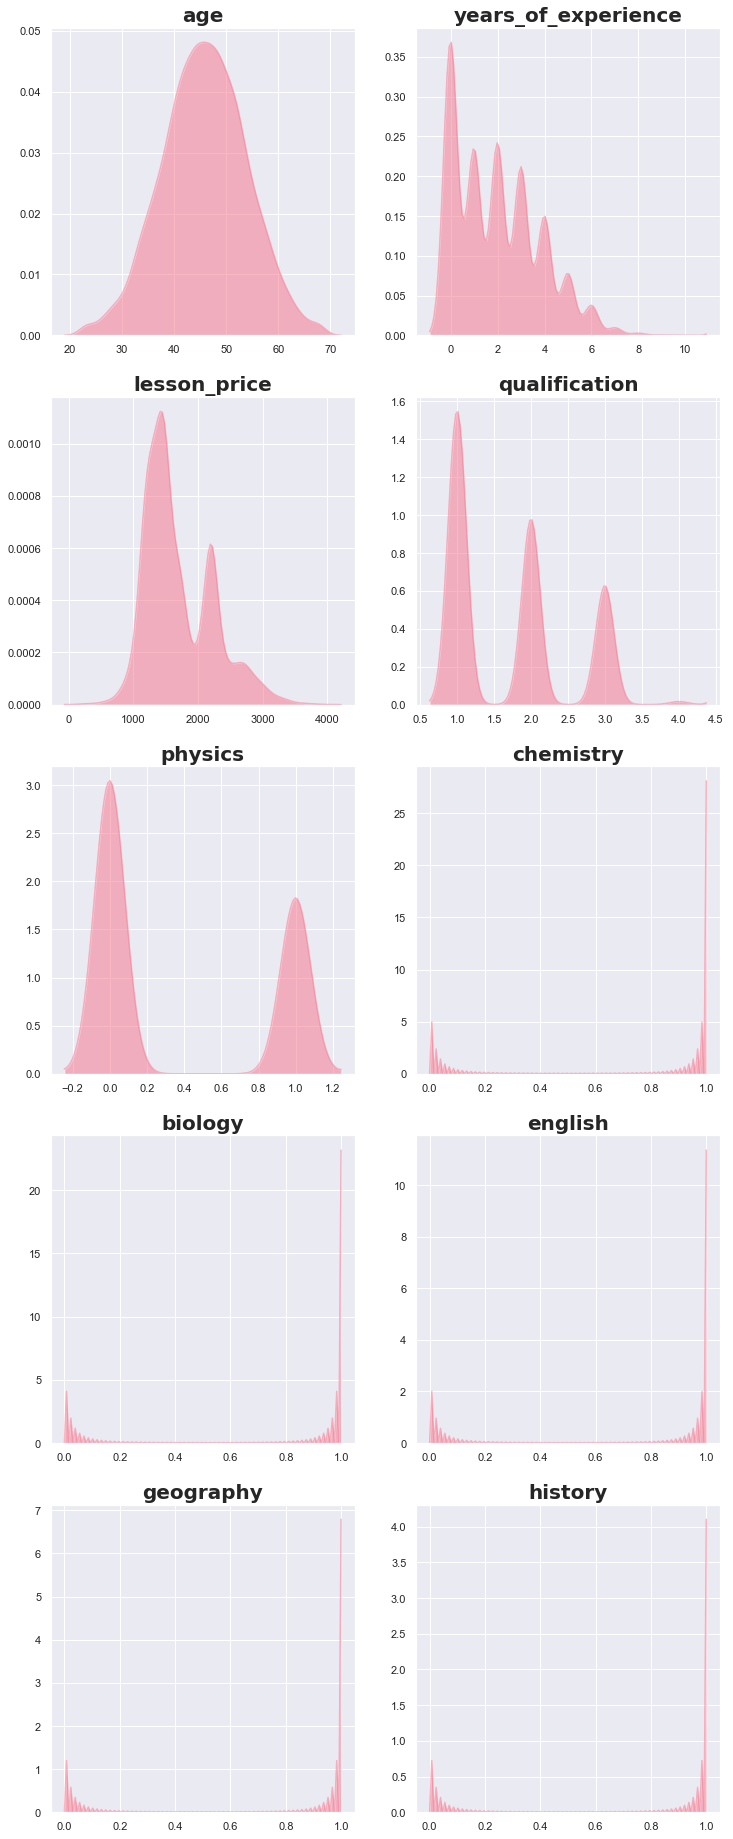

In [8]:
plt.figure(figsize=(12, 60))

for i, colname in enumerate(FEATURES):
    plt.subplot(9,2,i+1)
    plt.title(colname, fontdict=title_dict)
    sns.kdeplot(data_train[colname], shade=True, alpha=0.5, legend=False);

In [9]:
X = np.array(data_train.drop(columns=TARGET_NAME).drop(columns='Id'))
y = np.array(data_train[TARGET_NAME])

In [10]:
X[:5], X.shape

(array([[4.00e+01, 0.00e+00, 1.40e+03, 1.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
        [4.80e+01, 4.00e+00, 2.85e+03, 3.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [3.90e+01, 0.00e+00, 1.20e+03, 1.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [4.60e+01, 5.00e+00, 1.40e+03, 1.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [4.30e+01, 1.00e+00, 1.50e+03, 1.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]]), (10000, 10))

In [11]:
y[:5], y.shape

(array([63., 86., 53., 56., 59.]), (10000,))

In [12]:
test = np.array(data_test.drop(columns='Id'))
test[:5], test.shape

(array([[4.60e+01, 3.00e+00, 1.05e+03, 1.00e+00, 0.00e+00, 1.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [4.30e+01, 3.00e+00, 1.85e+03, 2.00e+00, 0.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [5.20e+01, 1.00e+00, 1.55e+03, 1.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [5.70e+01, 6.00e+00, 2.90e+03, 3.00e+00, 1.00e+00, 0.00e+00,
         1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
        [4.40e+01, 4.00e+00, 3.15e+03, 3.00e+00, 1.00e+00, 0.00e+00,
         0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]]), (10000, 10))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### Реализация обычного класса градиентного бустинга

In [14]:
%load_ext Cython

In [15]:
%%cython -a

import numpy as np
cimport numpy as np

cdef class RegressionTreeFastMse:
    
    cdef public int max_depth
    cdef public int feature_idx
    cdef public int min_size
    cdef public int averages 
    
    cdef public np.float64_t feature_threshold
    cdef public np.float64_t value

    cpdef RegressionTreeFastMse left
    cpdef RegressionTreeFastMse right
    
    def __init__(self, max_depth=3, min_size=4, averages=1):
        
        self.max_depth = max_depth
        self.min_size = min_size
        self.value = 0
        self.feature_idx = -1
        self.feature_threshold = 0
        self.left = None
        self.right = None
    
    def fit(self, np.ndarray[np.float64_t, ndim=2] X, np.ndarray[np.float64_t, ndim=1] y):

        cpdef np.float64_t mean1 = 0.0
        cpdef np.float64_t mean2 = 0.0
        cpdef long N = X.shape[0]
        cpdef long N1 = X.shape[0]
        cpdef long N2 = 0
        cpdef np.float64_t delta1 = 0.0
        cpdef np.float64_t delta2 = 0.0
        cpdef np.float64_t sm1 = 0.0
        cpdef np.float64_t sm2 = 0.0
        cpdef list index_tuples
        cpdef list stuff
        cpdef long idx = 0
        
        cpdef np.float64_t prev_error1 = 0.0
        cpdef np.float64_t prev_error2 = 0.0
        cpdef long thres = 0
        cpdef np.float64_t error = 0.0
        
        cpdef np.ndarray[long, ndim=1] idxs
        
        cpdef np.float64_t x = 0.0
            
        # начальное значение - среднее значение y
        self.value = y.mean()
        # начальная ошибка - mse между значением в листе 
        base_error = ((y - self.value) ** 2).sum()
        error = base_error
        flag = 0
        
        # пришли на максимальную глубину
        if self.max_depth <= 1:
            return
    
        dim_shape = X.shape[1]
        
        left_value, right_value = 0, 0
        
        for feat in range(dim_shape):
            
            prev_error1, prev_error2 = base_error, 0 
            idxs = np.argsort(X[:, feat])
            
            # переменные для быстрого переброса суммы
            mean1, mean2 = y.mean(), 0
            sm1, sm2 = y.sum(), 0
            
            N = X.shape[0]
            N1, N2 = N, 0
            thres = 1
            
            while thres < N - 1:
                N1 -= 1
                N2 += 1

                idx = idxs[thres]
                x = X[idx, feat]
                
                # вычисляем дельты - по ним, в основном, будет делаться переброс
                delta1 = (sm1 - y[idx]) * 1.0 / N1 - mean1
                delta2 = (sm2 + y[idx]) * 1.0 / N2 - mean2

                # увеличиваем суммы
                sm1 -= y[idx]
                sm2 += y[idx]
                
                # пересчитываем ошибки за O(1)
                prev_error1 += (delta1**2) * N1 
                prev_error1 -= (y[idx] - mean1)**2 
                prev_error1 -= 2 * delta1 * (sm1 - mean1 * N1)
                mean1 = sm1/N1
                
                prev_error2 += (delta2**2) * N2 
                prev_error2 += (y[idx] - mean2)**2 
                prev_error2 -= 2 * delta2 * (sm2 - mean2 * N2)
                mean2 = sm2/N2
                
                # пропускаем близкие друг к другу значения
                if thres < N - 1 and np.abs(x - X[idxs[thres + 1], feat]) < 1e-5:
                    thres += 1
                    continue
                
                if (prev_error1 + prev_error2 < error):
                    if (min(N1,N2) > self.min_size):
                    
                        # переопределяем самый лучший признак и границу по нему
                        self.feature_idx, self.feature_threshold = feat, x
                        # переопределяем значения в листах
                        left_value, right_value = mean1, mean2

                        # флаг - значит сделали хороший сплит
                        flag = 1
                        error = prev_error1 + prev_error2
                                     
                thres += 1
        
        # ничего не разделили, выходим
        if self.feature_idx == -1:
            return
        
        # вызываем потомков дерева
        self.left = RegressionTreeFastMse(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTreeFastMse(self.max_depth - 1)
        self.right.value = right_value
        
        # новые индексы для обучения потомков
        idxs_l = (X[:, self.feature_idx] > self.feature_threshold)
        idxs_r = (X[:, self.feature_idx] <= self.feature_threshold)
        
        # обучение потомков
        self.left.fit(X[idxs_l, :], y[idxs_l])
        self.right.fit(X[idxs_r, :], y[idxs_r])
        
    def __predict(self, np.ndarray[np.float64_t, ndim=1] x):
        
        if self.feature_idx == -1:
            return self.value
        
        if x[self.feature_idx] > self.feature_threshold:
            return self.left.__predict(x)
        else:
            return self.right.__predict(x)
        
    def predict(self, np.ndarray[np.float64_t, ndim=2] X):
            
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            y[i] = self.__predict(X[i])
            
        return y

In [16]:
class GradientBoosting():
    
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, 
                 random_state=17, n_samples = 15, min_size = 5, base_tree='Bagging'):
            
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.initialization = lambda y: np.mean(y) * np.ones([y.shape[0]])
        self.min_size = min_size
        self.loss_by_iter = []
        self.trees_ = []
        self.loss_by_iter_test = []
        self.n_samples = n_samples
        self.base_tree = base_tree

    
    def fit(self, X, y):
        self.X = X
        self.y = y
        b = self.initialization(y)
        
        prediction = b.copy()
        
        for t in tqdm_notebook(range(self.n_estimators)):               
            
            if t == 0:
                resid = y
            else:
                # сразу пишем антиградиент
                resid = (y - prediction)
            
            # выбираем базовый алгоритм
            if self.base_tree == 'Bagging':
                tree = Bagging(max_depth=self.max_depth,
                                       min_size = self.min_size)                
            if self.base_tree == 'Tree':
                tree = RegressionTreeFastMse(max_depth=self.max_depth,
                                          min_size = self.min_size)
                
            # обучаемся на векторе антиградиента
            tree.fit(X, resid)
            # делаем предикт и добавляем алгоритм к ансамблю
            b = tree.predict(X).reshape([X.shape[0]])
            self.trees_.append(tree)
            prediction += self.learning_rate * b
            # добавляем только если не первая итерация
            if t > 0:
                self.loss_by_iter.append(mse(y,prediction))
                   
        return self
    
    def predict(self, X):
        
        # сначала прогноз – это просто вектор из средних значений ответов на обучении
        pred = np.ones([X.shape[0]]) * np.mean(self.y)
        # добавляем прогнозы деревьев
        for t in range(self.n_estimators):
            pred += self.learning_rate * self.trees_[t].predict(X).reshape([X.shape[0]])
            
        return pred

### Бэггинг над решающими деревьями

In [17]:
class Bagging():
    
    def __init__(self, max_depth = 3, min_size=10, n_samples = 10):
            
        #super(CART, self).__init__()
        self.max_depth = max_depth
        self.min_size = min_size
        self.n_samples = n_samples
        self.subsample_size = None
        self.list_of_Carts = [RegressionTreeFastMse(max_depth=self.max_depth, 
                                min_size=self.min_size) for _ in range(self.n_samples)]

    def get_bootstrap_samples(self, data_train, y_train):
        
        # генерируем индексы выборок с возращением
        indices = np.random.randint(0, len(data_train), (self.n_samples, self.subsample_size))
        samples_train = data_train[indices]
        samples_y = y_train[indices]
        return samples_train, samples_y
    
    def fit(self, data_train, y_train):
        
        # обучаем каждую модель 
        self.subsample_size = int(data_train.shape[0])
        samples_train, samples_y = self.get_bootstrap_samples(data_train, y_train)
        for i in range(self.n_samples):
            self.list_of_Carts[i].fit(samples_train[i], samples_y[i].reshape(-1))
        return self
        
    def predict(self, test_data):
        
        # для каждого объекта берём его средний предикт
        num_samples = test_data.shape[0]
        pred = []
        for i in range(self.n_samples):
            pred.append(self.list_of_Carts[i].predict(test_data))
        pred = np.array(pred).T

        return np.array([np.mean(pred[i]) for i in range(num_samples)])

### Реализация аналога XGBoost

In [18]:
%%cython -a 

import numpy as np
cimport numpy as np

cdef class RegressionTreeGain:
    cdef public int max_depth
    cdef public np.float64_t gain
    cdef public np.float64_t lmd
    cdef public np.float64_t gmm
    
    cdef public int feature_idx
    cdef public int min_size

    cdef public np.float64_t feature_threshold
    cdef public np.float64_t value
    
    cpdef public RegressionTreeGain left
    cpdef public RegressionTreeGain right
    
    def __init__(self, int max_depth=3, np.float64_t lmd=1.0, np.float64_t gmm=0.1, min_size=5):
        self.max_depth = max_depth
        self.gmm = gmm
        self.lmd = lmd
        self.left = None
        self.right = None
        self.feature_idx = -1
        self.feature_threshold = 0
        self.value = -1e9
        self.min_size = min_size
        
        return
    
    def fit(self, np.ndarray[np.float64_t, ndim=2] X, np.ndarray[np.float64_t, ndim=1] y):
        
        cpdef long N = X.shape[0]
        cpdef long N1 = X.shape[0]
        cpdef long N2 = 0
        cpdef long idx = 0
        cpdef long thres = 0
        cpdef np.float64_t gl, gr, gn
        cpdef np.ndarray[long, ndim=1] idxs
        cpdef np.float64_t x = 0.0
        cpdef np.float64_t best_gain = -self.gmm
        
        if self.value == -1e9:
            self.value = y.mean()
        
        base_error = ((y - self.value) ** 2).sum()
        error = base_error
        flag = 0
        
        if self.max_depth <= 1:
            return
        
        dim_shape = X.shape[1]
        
        left_value = 0
        right_value = 0
        
        # начинаем процесс обучения
        
        for feat in range(dim_shape):
            
            idxs = np.argsort(X[:, feat])
             
            gl,gr = y.sum(),0.0

            N1, N2, thres = N, 0, 0
            
            while thres < N - 1:
                N1 -= 1
                N2 += 1

                idx = idxs[thres]
                x = X[idx, feat]
                
                gl -= y[idx]
                gr += y[idx]
                
                # считаем гейн
                gn = (gl**2) / (N1 + self.lmd)  + (gr**2) / (N2 + self.lmd)
                gn -= ((gl + gr)**2) / (N1 + N2 + self.lmd) + self.gmm
                
                if thres < N - 1 and x == X[idxs[thres + 1], feat]:
                    thres += 1
                    continue
                
                # проверяем условия на гейн
                if (gn > best_gain) and (min(N1,N2) > self.min_size):
                    
                    flag = 1
                    best_gain = gn
                    left_value = -gl / (N1 + self.lmd)
                    right_value = -gr / (N2 + self.lmd)
                    
                    self.feature_idx = feat
                    self.feature_threshold = x

                thres += 1
        
        self.gain = best_gain
        if self.feature_idx == -1:
            return
                
        self.left = RegressionTreeGain(max_depth=self.max_depth - 1, gmm=self.gmm, lmd=self.lmd)
        self.left.value = left_value
        self.right = RegressionTreeGain(max_depth=self.max_depth - 1, gmm=self.gmm, lmd=self.lmd)
        self.right.value = right_value
        
        idxs_l = (X[:, self.feature_idx] > self.feature_threshold)
        idxs_r = (X[:, self.feature_idx] <= self.feature_threshold)
    
        self.left.fit(X[idxs_l, :], y[idxs_l])
        self.right.fit(X[idxs_r, :], y[idxs_r])
        
        # подрубаем отрицательный гейн
        if (self.left.left == None or self.right.left == None):
            if self.gain < 0.0:
                self.left = None
                self.right = None
                self.feature_idx = -1

    def __predict(self, np.ndarray[np.float64_t, ndim=1] x):
        if self.feature_idx == -1:
            return self.value
        
        if x[self.feature_idx] > self.feature_threshold:
             return self.left.__predict(x)
        else:
            return self.right.__predict(x)
        
    def predict(self, np.ndarray[np.float64_t, ndim=2] X):
        y = np.zeros(X.shape[0])
        
        for i in range(X.shape[0]):
            y[i] = self.__predict(X[i])
            
        return y

In [19]:
class Bagging():
    
    def __init__(self, max_depth = 3, min_size=5, n_samples = 10):
            
        self.max_depth = max_depth
        self.min_size = min_size
        self.n_samples = n_samples
        self.subsample_size = None
        self.list_of_Carts = [RegressionTreeGain(max_depth=self.max_depth, 
                                min_size=self.min_size) for _ in range(self.n_samples)]

    
    def get_bootstrap_samples(self, data_train, y_train):
        
        indices = np.random.randint(0, len(data_train), (self.n_samples, self.subsample_size))
        samples_train = data_train[indices]
        samples_y = y_train[indices]
        return samples_train, samples_y
    
    def fit(self, data_train, y_train):
        
        self.subsample_size = int(data_train.shape[0])
        samples_train, samples_y = self.get_bootstrap_samples(data_train, y_train)
        for i in range(self.n_samples):
            self.list_of_Carts[i].fit(samples_train[i], samples_y[i].reshape(-1))
        return self
        
    def predict(self, test_data):
        
        num_samples = test_data.shape[0]
        pred = []
        for i in range(self.n_samples):
            pred.append(self.list_of_Carts[i].predict(test_data))
        pred = np.array(pred).T

        return np.array([np.mean(pred[i]) for i in range(num_samples)])

In [20]:
class GradientBoosting():
    

    def __init__(self, n_estimators=100, learning_rate=0.2, max_depth=3, 
                 random_state=17, n_samples = 15, min_size = 5, base_tree='Bagging'):
            
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.initialization = lambda y: np.mean(y) * np.ones([y.shape[0]])
        self.min_size = min_size
        self.loss_by_iter = []
        self.trees_ = []
        self.loss_by_iter_test = []
        self.n_samples = n_samples
        self.base_tree = base_tree

        # хотим как-то регулировать работу алгоритма на поздних итерациях
        # если ошибка застряла, то уменьшаем lr и увеличиваем max_depth
        self.add_to_max_depth = 1
        self.init_mse_board = 1.5
    
    def fit(self, X, y):
        print (self.base_tree)
        self.X = X
        self.y = y
        b = self.initialization(y)
        
        prediction = b.copy()
        
        for t in tqdm_notebook(range(self.n_estimators)):
                        
            if t == 0:
                resid = y
            else:
                resid = (y - prediction)
                if (mse(temp_resid,resid) < self.init_mse_board):
                    self.init_mse_board /= 1.5
                    self.add_to_max_depth += 1
                    self.learning_rate /= 1.1
                    # print ('Alert!', t, self.add_to_max_depth)
            
            if self.base_tree == 'Bagging':
                tree = Bagging(max_depth=self.max_depth+self.add_to_max_depth,
                                         min_size = self.min_size)
                resid = -resid
                
            if self.base_tree == 'Tree':
                tree = RegressionTreeFastMse(max_depth=self.max_depth+self.add_to_max_depth, min_size = self.min_size)
                
            if self.base_tree == 'XGBoost':
                tree = RegressionTreeGain(max_depth=self.max_depth+self.add_to_max_depth, min_size = self.min_size)
                resid = -resid
                
            tree.fit(X, resid)
            b = tree.predict(X).reshape([X.shape[0]])
            # print (b.shape)
            self.trees_.append(tree)
            prediction += self.learning_rate * b
            temp_resid = resid

        return self
    
    def predict(self, X):
        
        # сначала прогноз – это просто вектор из средних значений ответов на обучении
        pred = np.ones([X.shape[0]]) * np.mean(self.y)
        # добавляем прогнозы деревьев
        for t in range(self.n_estimators):
            pred += self.learning_rate * self.trees_[t].predict(X).reshape([X.shape[0]])
            
        return pred

### Обучение модели

In [21]:
XGBoost = GradientBoosting(max_depth=3, n_estimators=50, base_tree='XGBoost')
XGBoost.fit(X, y)
x = XGBoost.predict(X)

XGBoost


In [22]:
x

array([63.80744163, 89.72739307, 53.03460493, ..., 59.66886762,
       54.57466525, 55.7573794 ])

### Проводим предсказание на тестовых данных

In [23]:
X_test = np.array(data_test.drop(columns='Id'))

In [24]:
X_test

array([[4.60e+01, 3.00e+00, 1.05e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.30e+01, 3.00e+00, 1.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.20e+01, 1.00e+00, 1.55e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.30e+01, 5.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.80e+01, 0.00e+00, 1.75e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.90e+01, 5.00e+00, 2.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [25]:
pred_test = XGBoost.predict(X_test)

In [26]:
pred_test

array([55.46366674, 63.60943357, 50.25308216, ..., 54.65055542,
       63.95600859, 71.0713918 ])

In [27]:
data_test[TARGET_NAME] = pred_test
data_test[TARGET_NAME] = data_test[TARGET_NAME].astype('float64')

In [28]:
# Сохраняем полученные предсказания
data_test.loc[:, ['Id', TARGET_NAME]].to_csv('data/NLitvak_predictions.csv', index=None)